# Projet abeilles -> exploration des data

In [9]:
#Chargement des librairies
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import contextily as cx
from shapely.geometry import Point
import geopandas as gpd

## Configuration

In [10]:
#Configuration
srcFolder = "../data/raw/tempo_202510201126/"
dstFolder = "../data/processed/tempo_202510201126/"
sources = [
    "agroclim_pheno.csv",
    "epiphyt.csv",
    "foret.csv",
    "ods_recherche.csv",
    "ods_tela_botanica.csv",
    "phenoclim_agroclim_inrae.csv",
    "phenoclim_crea_mont_blanc.csv",
    "phetec_inrae.csv",
    "variables_communes.csv"
]
colonnes = [
    'date', 
    'annee', 
    'jour_de_l_annee', 
    'source_donnees',
    'latitude_du_site', 
    'longitude_du_site',
    'regne', 
    'genre',
    'espece',
    'code_du_stade_phenologique'
]

especes = {
    'nom_commun' : [
        'Marronnier',
        'Acacia',
        'Merisier',
        'Prunier myrobolan',
        'Griottier',
        'Prunier'
    ],
    'genre' : [
        'Aesculus',
        'Robinia',
        'Prunus',
        'Prunus',
        'Prunus',
        'Prunus'

    ],
    'espece' : [
        'hippocastanum',
        'pseudoacacia',
        'avium',
        'cerasifera',
        'cerasus',
        'domestica'
    ]
}

df_especes = pd.DataFrame(especes)


## Importation des données phénologiques

In [11]:
#Chargement des stades phénologiques
stadesPhenologiques = pd.read_csv(
    srcFolder+"stades.csv",
    encoding='ISO-8859-1', 
    sep=';',
    low_memory=False
)
stadesPhenologiques.head(10)

,stade_id,code_du_stade_phenologique,n_de_l_echelle_phenologique,echelle_phenologique,code_de_l_evenement_phenologique_majeur,code_de_l_evenement_phenologique_majeur.1,description_du_stade
0,4412,60,4,BBCH,6,Floraison (tige principale),Apparition des pétales
1,107,61,4,BBCH,6,Floraison (tige principale),Environ 10% des fleurs épanouies
2,103,65,4,BBCH,6,Floraison (tige principale),Environ 50% des fleurs épanouies
3,125,69,4,BBCH,6,Floraison (tige principale),"Fin de la floraison // Fin de la floraison, ..."
4,4371,61,79,BBCH Asteraceae,6,Floraison (tige principale),La floraison: Début = fleurs ligulées dressées...
5,4387,65,79,BBCH Asteraceae,6,Floraison (tige principale),Pleine floraison : fleurs tubuleuses sur le ti...
6,4369,61,77,BBCH Brassicaceae,6,Floraison (tige principale),La floraison: 10 % des fleurs de la grappe pri...
7,4397,65,77,BBCH Brassicaceae,6,Floraison (tige principale),Pleine floraison : 50 % des fleurs de la grapp...
8,4575,61,91,BBCH CREA Mont-Blanc,6,Floraison (tige principale),"Environ 10% des fleurs sépanouissent, les aut..."
9,4391,61,78,BBCH Fabaceae,6,Floraison (tige principale),La floraison: début = 10 % des fleurs sont ouv...


In [12]:
#Récupération et combinaison des sources
dataFrames = []

for source in sources:
    print(f"Chargement source {source}...")
    
    data = pd.read_csv(
        srcFolder+source,
        encoding='ISO-8859-1', 
        sep=';',
        low_memory=False,
        usecols=colonnes
    )
    print(f"{data.shape[0]} lignes chargées !")
    dataFrames.append(data)
    print("----------------------------------------------")

allData = pd.concat(dataFrames, ignore_index=True)
print(f"Nombre total de résultats : {allData.shape[0]}")
allData['date'] = pd.to_datetime(allData['date'])
allData = allData[allData['date'] >= '1950-01-01']
print(f"Nombre de résultats > 1950 : {allData.shape[0]}")
allData.head(10)




Chargement source agroclim_pheno.csv...
7635 lignes chargées !
----------------------------------------------
Chargement source epiphyt.csv...
255818 lignes chargées !
----------------------------------------------
Chargement source foret.csv...
48070 lignes chargées !
----------------------------------------------
Chargement source ods_recherche.csv...
16090 lignes chargées !
----------------------------------------------
Chargement source ods_tela_botanica.csv...
11613 lignes chargées !
----------------------------------------------
Chargement source phenoclim_agroclim_inrae.csv...
8026 lignes chargées !
----------------------------------------------
Chargement source phenoclim_crea_mont_blanc.csv...
13075 lignes chargées !
----------------------------------------------
Chargement source phetec_inrae.csv...
126 lignes chargées !
----------------------------------------------
Chargement source variables_communes.csv...
360453 lignes chargées !
-----------------------------------------

,date,annee,jour_de_l_annee,source_donnees,latitude_du_site,longitude_du_site,regne,genre,espece,code_du_stade_phenologique
13,1950-03-23,1950,82,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61
14,1950-04-14,1950,104,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,65
15,1951-04-03,1951,93,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61
1801,1965-04-13,1965,103,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,65
1802,1966-04-06,1966,96,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61
1875,1952-04-10,1952,101,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61
1876,1953-03-30,1953,89,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61
1877,1955-04-12,1955,102,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61
1878,1956-04-12,1956,103,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61
1879,1957-03-23,1957,82,AgroClim Pheno,48.8,2.08,Plantae,Acer,platanoides,61


## Description des données

In [13]:
#Affichage d'infos
allData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647834 entries, 13 to 720905
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date                        647834 non-null  datetime64[ns]
 1   annee                       647834 non-null  int64         
 2   jour_de_l_annee             647834 non-null  int64         
 3   source_donnees              647834 non-null  object        
 4   latitude_du_site            647834 non-null  float64       
 5   longitude_du_site           647834 non-null  float64       
 6   regne                       647834 non-null  object        
 7   genre                       647834 non-null  object        
 8   espece                      647834 non-null  object        
 9   code_du_stade_phenologique  647834 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 54.4+ MB


In [14]:
#Statistiques descriptives
allData.describe()

,date,annee,jour_de_l_annee,latitude_du_site,longitude_du_site,code_du_stade_phenologique
count,647834,647834.000000,647834.000000,647834.000000,647834.000000,647834.000000
mean,2014-10-21 22:42:04.135504128,2014.428743,138.482855,46.661177,2.430085,64.033570
min,1950-01-15 00:00:00,1950.000000,1.000000,41.571730,-4.760930,60.000000
25%,2015-06-01 00:00:00,2015.000000,124.000000,44.786500,-0.063660,61.000000
50%,2017-05-30 00:00:00,2017.000000,146.000000,46.950790,2.361290,65.000000
75%,2019-05-27 00:00:00,2019.000000,158.000000,48.458050,4.833050,67.000000
max,2025-09-29 00:00:00,2025.000000,366.000000,51.024110,9.528950,69.000000
std,NaN,10.381486,34.453682,2.121356,2.832285,3.352017


In [15]:
#Données intéressantes
print(f"Année min : {allData.min(axis=0)['annee']}")
print(f"Année max : {allData.max(axis=0)['annee']}")
stades = allData["code_du_stade_phenologique"].unique()
print(f"Stades phénologiques : {stades}")
genres = allData["genre"].unique()
print(f"Genres : {genres}")
print("Stades phénologiques :")
stadesFiltres = stadesPhenologiques[stadesPhenologiques["code_du_stade_phenologique"].isin(stades)]
print(stadesFiltres)
#Représentation intéressante : observations par année

Année min : 1950
Année max : 2025
Stades phénologiques : [61 65 69 60 68 66 63 67 62 64]
Genres : ['Acer' 'Corylus' 'Berberis' 'Colchicum' 'Crataegus' 'Ligustrum' 'Malus'
 'Phytolacca' 'Primula' 'Fagus' 'Ficaria' 'Forsythia' 'Pyrus' 'Prunus'
 'Solidago' 'Syringa' 'Tilia' 'Betula' 'Aesculus' 'Aucuba' 'Ilex'
 'Coriaria' 'Diervilla' 'Leucanthemum' 'Lilium' 'Osmanthus' 'Polygonum'
 'Ribes' 'Salvia' 'Sambucus' 'Viburnum' 'Bocconia' 'Buxus' 'Calycanthus'
 'Canna' 'Cerasus' 'Sorbus' 'Tussilago' 'Vitis' 'Triticum' 'Brassica'
 'Hordeum' 'Zea' 'Solanum' 'Phaseolus' '×Triticosecale' 'Helianthus'
 'Fragaria' 'Lathyrus' 'Olea' 'Platanus' 'Asparagus' 'Linum' 'Daucus'
 'Cucurbita' 'Cucumis' 'Lactuca' 'Allium' 'Spinacia' 'Fraxinus' 'Carpinus'
 'Picea' 'Pinus' 'Quercus' 'Robinia' 'Alnus' 'Castanea' 'Juglans'
 'Narcissus' 'Populus' 'Salix' 'Larix' 'Arbutus' 'Cedrus' 'Cupressaceae'
 'Cupressus' 'Ailanthus' 'Pseudotsuga' 'Abies' 'Anemone' 'Lonicera'
 'Magnolia' 'Mahonia' 'Papaver' 'Philadelphus' 'Sorbaria

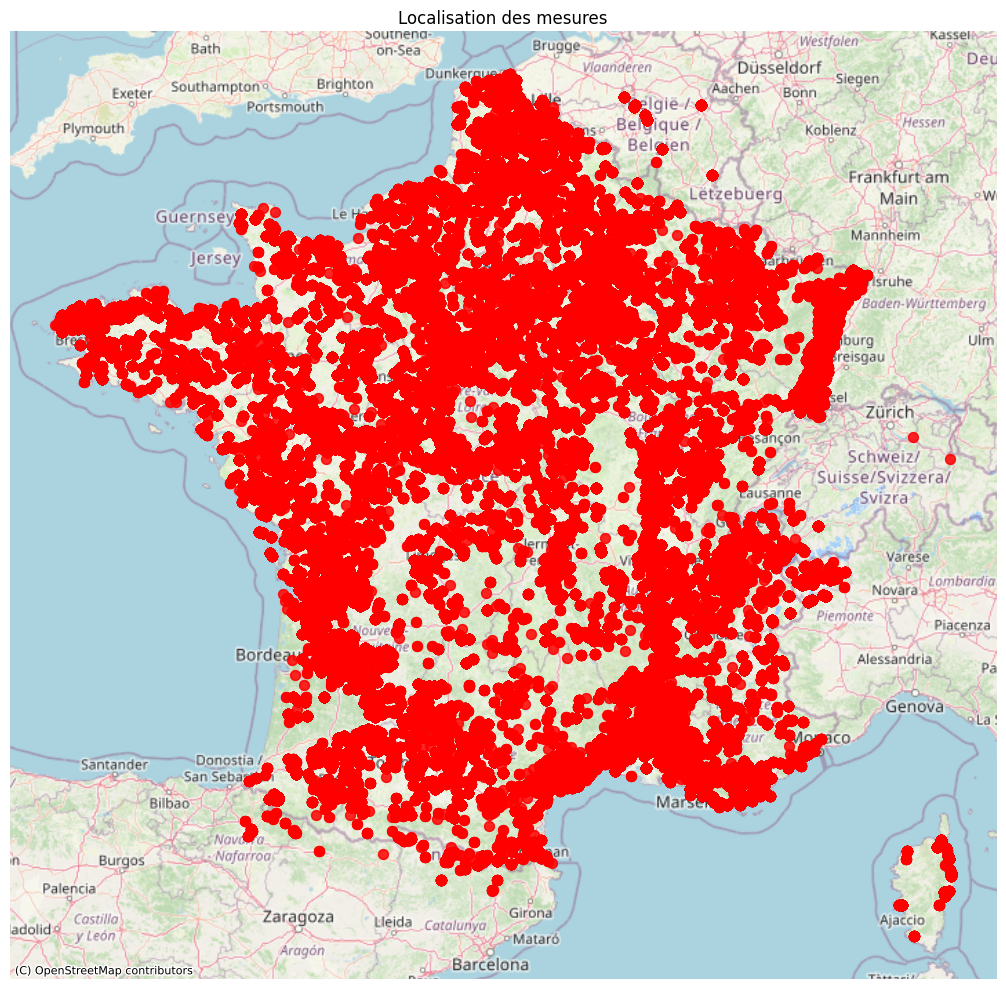

In [16]:
#Représentation

# Créer un GeoDataFrame
gdf = gpd.GeoDataFrame(
    allData,
    geometry=gpd.points_from_xy(allData['longitude_du_site'], allData['latitude_du_site']),
    crs='EPSG:4326'
)

# Reprojeter en Web Mercator pour contextily
gdf = gdf.to_crs(epsg=3857)

# Créer la carte
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.6)

# Ajouter le fond de carte
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

plt.title('Localisation des mesures')
plt.axis('off')
plt.tight_layout()
plt.show()

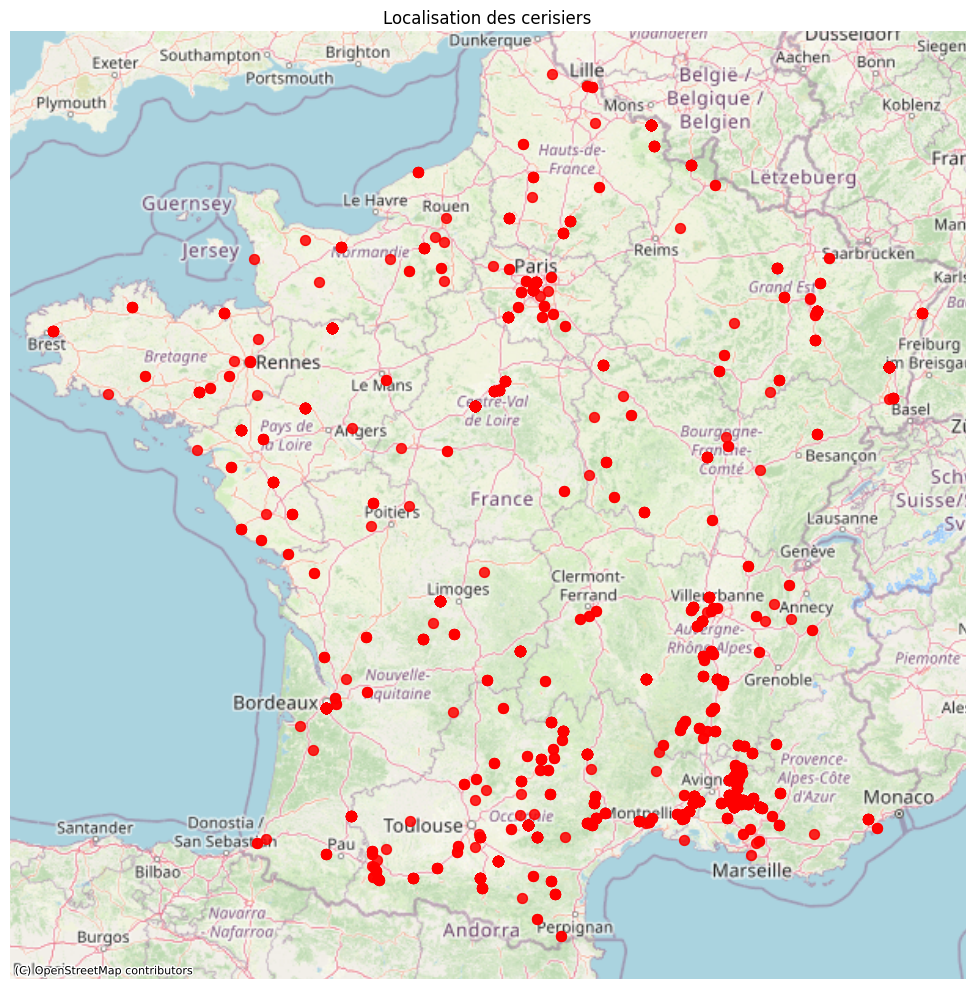

In [18]:
#Localisation des cerisiers
  
df_cerisiers = allData[(allData["regne"] == "Plantae") & (allData["genre"] == "Prunus") & (allData["espece"] == "avium")]

# Créer un GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_cerisiers,
    geometry=gpd.points_from_xy(df_cerisiers['longitude_du_site'], df_cerisiers['latitude_du_site']),
    crs='EPSG:4326'
)

# Reprojeter en Web Mercator pour contextily
gdf = gdf.to_crs(epsg=3857)

# Créer la carte
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.6)

# Ajouter le fond de carte
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

plt.title('Localisation des cerisiers')
plt.axis('off')
plt.tight_layout()
plt.show()

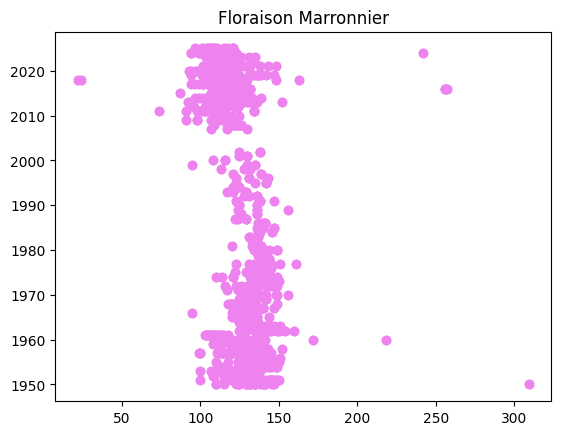

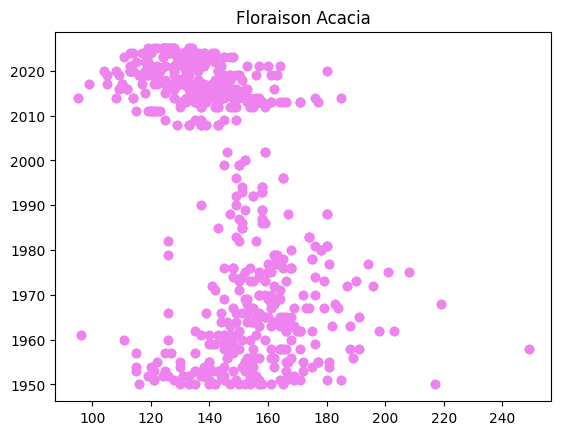

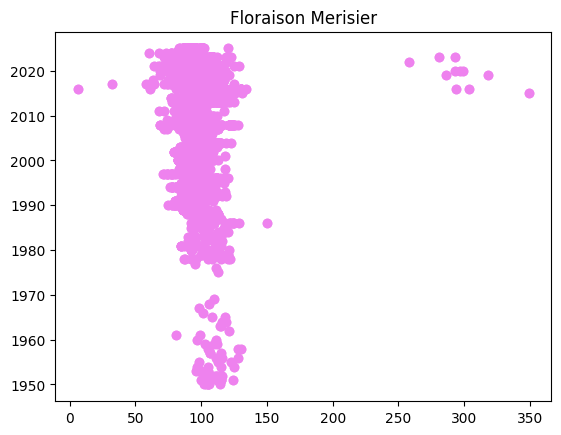

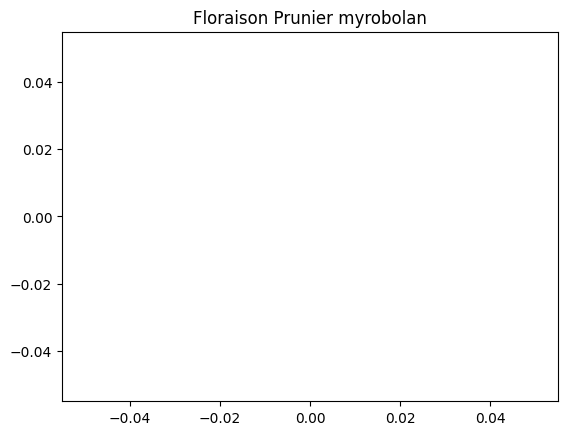

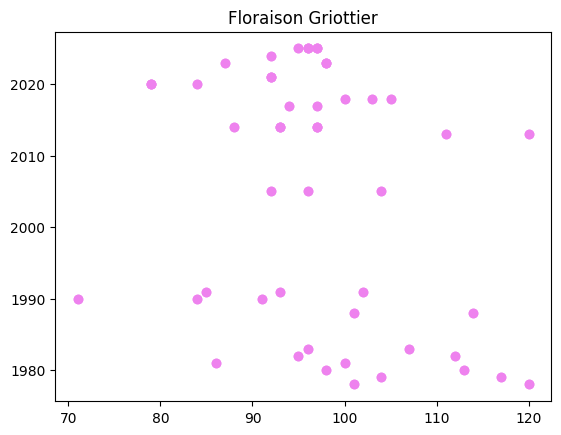

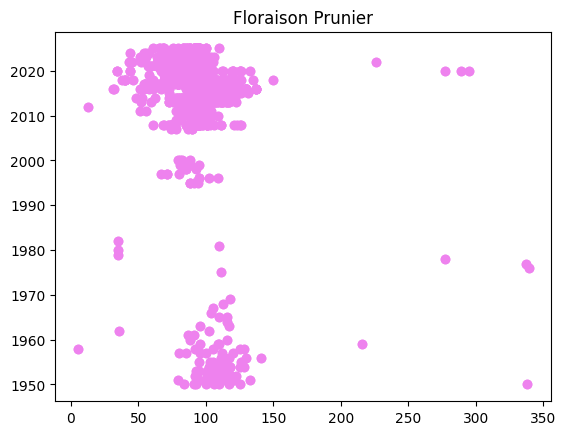

In [19]:
for index, row in df_especes.iterrows():
    df_sub = allData[(allData["genre"] == row["genre"]) & (allData["espece"] == row["espece"])]
    plt.scatter(df_sub["jour_de_l_annee"], df_sub["annee"], c='violet')
    plt.title(f"Floraison {row["nom_commun"]}")
    plt.show()




## Sauvegarde des données

In [ ]:
allData.to_csv(dstFolder+"phenologie.csv")

In [ ]:
#Regrouper
allData['plante'] = allData['regne'] + ' ' + allData['genre'] + ' ' + allData['espece']

#https://identify.plantnet.org/fr/k-world-flora/species
#https://www.genialvegetal.net/Trouver-une-plante
comptage = allData['plante'].value_counts()
comptage.head(20)

#Plantae Prunus persica : pèche 13734
#Plantae Malus domestica : pommier 10572
#Plantae Prunus avium  Merisier ou cerisier des oiseaux : 5624
#https://www.apiculture.net/blog/plante-mellifere-le-merisier-n195





plante
Plantae Vitis vinifera        177004
Plantae Triticum aestivum     161456
Plantae Hordeum vulgare        44832
Plantae Brassica napus         33318
Plantae Zea mays               17610
Plantae Solanum tuberosum      15368
Plantae Prunus persica         13734
Plantae Olea europaea          10950
Plantae Malus domestica        10572
Plantae Triticum turgidum       7814
Plantae Corylus avellana        7484
Plantae Lathyrus oleraceus      6794
Plantae ×Triticosecale sp.      5938
Plantae Fraxinus excelsior      5892
Plantae Prunus avium            5624
Plantae Syringa vulgaris        5344
Plantae Betula pendula          4936
Plantae Pyrus communis          4768
Plantae Anemone nemorosa        4552
Plantae Poaceae sp.             4080
Name: count, dtype: int64